In [3]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import re

In [4]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/mateus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mateus/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/mateus/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/mateus/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/mateus/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
#Criando data frame
data_frame = pd.read_csv("SMSSpamCollection", sep="\t" ,header = None, names=["label","message"])
display(data_frame)

count = data_frame['label'].value_counts()
print(count)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


label
ham     4825
spam     747
Name: count, dtype: int64


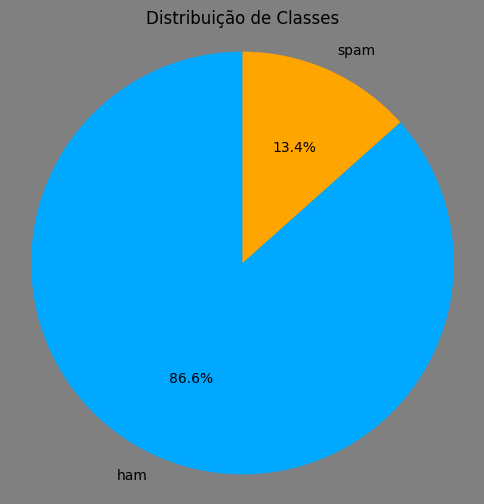

In [6]:
#plotando Distribuição de Classes
fig, ax = plt.subplots(figsize=(6,6), facecolor='grey')
colors = ['#00A8FF', '#FFA500'] 
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribuição de Classes')
plt.axis('equal')
plt.show()


In [7]:
#Contagem de palavras
def word_count(text):
    return len(str(text).split())
data_frame['Word_Count'] = data_frame['message'].apply(word_count)

display(data_frame)

#Calculando a soma total de palavras
total_words = data_frame['Word_Count'].sum()
print("Número total de palavras: ",total_words)

,label,message,Word_Count
0,ham,"Go until jurong point, crazy.. Available only ...",20
1,ham,Ok lar... Joking wif u oni...,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,ham,U dun say so early hor... U c already then say...,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,30
5568,ham,Will ü b going to esplanade fr home?,8
5569,ham,"Pity, * was in mood for that. So...any other s...",10
5570,ham,The guy did some bitching but I acted like i'd...,26


Número total de palavras:  86909


In [8]:
#Realizando o pré processamento

def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

def remove_urls(text):
    return re.sub(r'http\S+|www\.\S+','', text)

def remove_tags(text):
    return re.sub(r'#\w+|@\w+','', text)

def remove_punctuation(text):
    text = ''.join(char for char in text if char not in string.punctuation)
    return text

def remove_numbers(text):
    return re.sub(r'\d+','',text)

def remove_repetitions(text):
    return re.sub(r'(.)\1{2,}',r'\1\1', text)

def remove_small(text):
    return [word for word in text if len(word) >= 3]

#não esta funcionando
lemmatizer = WordNetLemmatizer()
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

def preprocces(text):
    text = text.lower()
    text = remove_urls(text)
    text = remove_tags(text)
    text = remove_punctuation(text)
    text = remove_numbers(text)
    text = remove_repetitions(text)
    tokens = text.split()
    tokens = remove_stopwords(tokens)
    tokens = remove_small(tokens)
    #tokens = lemmatize_tokens(tokens)
    return tokens

data_frame['message'] = data_frame['message'].apply(preprocces)


data_frame['Word_Count'] = data_frame['message'].apply(word_count)
total_words = data_frame['Word_Count'].sum()
print("Número total de palavras: ",total_words)

display(data_frame['message'])


Número total de palavras:  44421


0       [jurong, point, crazy, available, bugis, great...
1                                 [lar, joking, wif, oni]
2       [free, entry, wkly, comp, win, cup, final, tkt...
3                    [dun, say, early, hor, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [time, tried, contact, pound, prize, claim, ea...
5568                             [going, esplanade, home]
5569                     [pity, mood, soany, suggestions]
5570    [guy, bitching, acted, like, interested, buyin...
5571                                   [rofl, true, name]
Name: message, Length: 5572, dtype: object

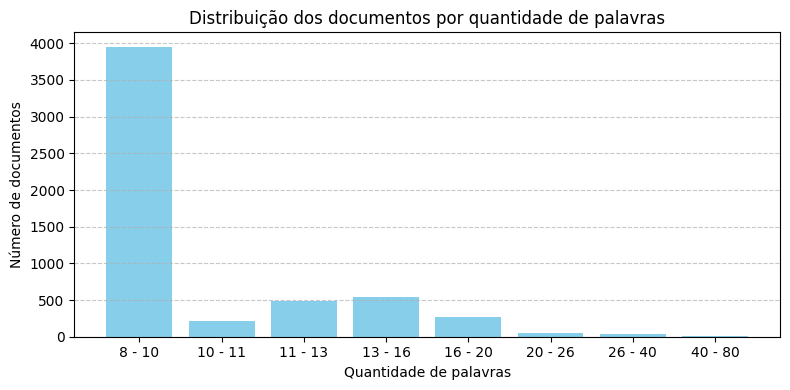

In [ ]:
max_words = data_frame['Word_Count'].max()
num_bar = 8
count = np.zeros(num_bar)

for doc in data_frame['Word_Count']:
    for i in range(num_bar):
        if doc <= max_words/(num_bar-i):
            count[i]+=1
            break

labels = []
for i in range(num_bar):
    lower_bound = int(max_words / (num_bar - i + 1))  
    upper_bound = int(max_words / (num_bar - i))      
    labels.append(f"{lower_bound} - {upper_bound}")

plt.figure(figsize=(8, 4))
plt.bar(labels, count, color='skyblue')
plt.xlabel('Quantidade de palavras')
plt.ylabel('Número de documentos')
plt.title('Distribuição dos documentos por quantidade de palavras')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
#TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

documents = data_frame['message'].apply(lambda tokens: ' '.join(tokens)).tolist()

vectorizer = TfidfVectorizer()
tf_idf = vectorizer.fit_transform(documents).toarray()
vocab = vectorizer.get_feature_names_out().tolist()

tf_idf_df = pd.DataFrame(tf_idf, columns=vocab)
display(tf_idf_df)

,aah,aaniye,aaooright,aathilove,aathiwhere,abbey,abdomen,abeg,abelu,aberdeen,...,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,üll,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
#KNN Algorithm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

def euclidean_distance(point1,point2):
    assert len(point1) == len(point2)
    distance = sum((p1-p2)**2 for p1,p2 in zip(point1,point2)) ** 0.5
    return distance

def find_neighbors(X_train, query_point, k):
    distances=[]
    for i, data_point in enumerate(X_train):
        distance = euclidean_distance(query_point, data_point)
        distances.append((i,distance))
    distances.sort(key=lambda x:x[1])
    neighbors = [index for index, _ in distances[:k]]
    return neighbors
    
def predict(X_train, y_train, query_point, k):
    neighbors = find_neighbors(X_train, query_point,k)
    neighbor_label = [y_train[i] for i in neighbors]

    label_counts = {}
    for label in neighbor_label:
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1
    
    predicted_class = max(label_counts, key=label_counts.get)
    return predicted_class

X = tf_idf_df.values
y = data_frame['label'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.6,random_state=42)
k=5
predictions = []

for query_point in X_test:
    pred = predict(X_train, y_train, query_point, k)
    predictions.append(pred)

print("Acurácia:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

KeyboardInterrupt: 

In [ ]:
#SVM Algorithm

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

X = tf_idf_df.values #Os dados de entrada(as mensagens com o TF-IDF aplicado)
label_enconder = LabelEncoder()
y = label_enconder.fit_transform(data_frame['label']) #transforma o label em número: 0->ham 1->spam

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42) #80% da entrada foi usada para terinamento e 20% para teste, com um valor de aleatoriedade 42

#Treinando o modelo SVM
svm_model = SVC(kernel='linear', C=1.0) #Treinando o modelo com kernel linear(apenas 2 classes) e margem de tamanho 1
svm_model.fit(X_train, y_train) 

#Avaliando o modelo
y_pred = svm_model.predict(X_test) #Aplicando o modelo no resto das entradas com o modelo ja treinado


In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9847533632286996
